<img src="tpan1.png">

###### Réaliser par : 
#### *** ibtissem BOUZIDI 2 DNI 1 ***

>* **<span style="color:#0000C0">L'intégration numérique: </span>**

>L'intégration numérique est un chapitre important de l'analyse numérique et un outil indispensable en physique numérique. On intègre numériquement dans deux cas principaux :

>* on ne peut pas intégrer analytiquement,
>* l'intégrande est fourni non pas sous la forme d'une fonction mais de tableaux de mesures, cas d'ailleurs le plus fréquent dans la vraie vie.

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from ipywidgets import *

In [2]:
from IPython.display import IFrame
doc = IFrame(src='https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html',width=1000, height=400)
display(doc)

In [3]:
f=lambda x:1/(1+x**2)

In [4]:
class Milieu(object): #class rectange 
    def __init__(self, a, b, n, f):#initialiser les paramètres du classe
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x# contiens les xi
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        fig, ax = plt.subplots(1, figsize=(9, 4))
        ax.clear()
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)
                    
        units = 'a = {}  \nb= {} \nn= {} \nI ={}' 
        ax.plot(xl, yl, label=units.format(self.a, self.b,self.n, self.integrate(f)))
       
        
        for i in range(self.n):
            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] # ordonnees des sommets

            
            plt.plot(x_rect, y_rect,"b")
            yflist_fine = f(xlist_fine)
            plt.plot(xlist_fine, yflist_fine)
            ax.legend(loc=1)
            plt.plot(m,f(m),"y*")
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.title('Milieu')

In [5]:
def simul2 (a,b,n,f):
    R=Milieu(a,b,n,f)
    return R.Graph(f)

a = widgets.IntSlider(min=-1, max=10, value=1, description='a:')
b = widgets.IntSlider(min=-2, max=5, value=0, description='b:')
n=widgets.IntSlider(min=1, max=50, step=5,value=10,description='n:')
widgets.interactive(simul2, a=a, b=b, n=n, f={
                                        '1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),
                                        'cos(x)': lambda x:cos(x),
                                        'x**2-x+5': lambda x:x**2-x+5
                                        }
                   )


interactive(children=(IntSlider(value=1, description='a:', max=10, min=-1), IntSlider(value=0, description='b:…

* **<span style="color:#0000C0">Le schéma de Simpson: </span>**
>**<span style="color:orange">L'algorithme: </span>**
>Dans la méthode des trapèzes, nous avons en fait interpolé $f(x)$ par une droite entre les points i et i+h de l'intervalle. Dans la méthode de Simpson, nous n'allons plus interpoler par une droite mais par un polynôme de degré 2, ce qui va améliorer notre précision.
Plaçons nous autour d'un point x0 appartenant à l'intervalle $[a,b]$, dans la maille de calcul x0-h et x0+h. Pour un accroissement $(x-x0)$, le développement de Taylor limité au second ordre nous donne :
$f(x) = f(x_0) + (x-x_0)f'(x_0) + (\frac{1}{2})(x-x_0)^2f"(x_0) + O((x-x_0)^3)$.
Nous savons que $f'(x_0) = f(x_0+h) - \frac{f(x_0-h)}{2h}$ et que $f"(x_0) = (f(x_0+h) - 2f(x_0)+ {f(x_0-h))}{h^2}$ . Si nous remplaçons ces valeurs dans le développement limité et que l'on intègre entre x0-h et x0+h, on obtient l'aire élémentaire $(f(x0+h) + 4f(x0)+ f(x0-h))*\frac{h}{3}$.
L'intégrale recherchée s'obtient en sommant toutes les aires élémentaires.
<br><strong>ATTENTION : </strong>le nombre d'intervalles doit être pair.

In [6]:
class Simpson(object):
    def __init__(self, a, b, n, f): #initialiser les paramètres du classe
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,n+1)#les pts supports
        self.f = f
        self.n = n #nombre de subdivision

    def integrate(self,f):#calculer la somme ((b-a)/6*n)*[f(a)+2*sum(xi)+4*sum(mi)+f(b)]
        x=self.x #les points supports xi #x(0)=a-->x(n)=b
        y=f(x) #yi variable local y(o)=f(xo)-->y(n)
        h = float(x[1] - x[0])#pas h=(b-a)/2*n
        n = len(x) - 1#nombre subdivision
        if n % 2 == 1:#si le reste de la division =1 impaire
            n -= 1#☺nombre de sub ywali paire
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        #y[1:-1:2] min impaire loulla m0 lil 9bal likhrania 5ater 3anna deja y(n) par pas de 2== mi
        #calculer la somme
        #T(-1] dernier valeur dans le tableau)
        return h * s / 3.0
    def Graph(self,f,resolution=1001):#1000 points 1001 résolution juste pour dessiner f
        xl = self.x #pt support
        yl = f(xl) #yi
        xlist_fine=np.linspace(self.a, self.b, resolution)
        # pour le graph de la fonction f #intervalle ab subdiviser en 1000 poitns
        for i in range(self.n):#range intervalle 0 à n
            xx=np.linspace(xl[i], xl[i+1], resolution)
            #pour chaque subdivisuion  on doit dessiner polynome dnc on doit aussi le subdiviser
            m=(xl[i]+xl[i+1])/2#pt milieu
            a=xl[i]#borne gauche
            b=xl[i+1]#borne droite
            l0 = (xx-m)/(a-m)*(xx-b)/(a-b)
            l1 = (xx-a)/(m-a)*(xx-b)/(m-b)
            l2 = (xx-a)/(b-a)*(xx-m)/(b-m)
            P = f(a)*l0 + f(m)*l1 + f(b)*l2#fonction dde polynome
            plt.plot(xx,P,'m')#dessiner polynome d'interpolation
        yflist_fine = f(xlist_fine)#fontion f
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.plot(xl, yl,'wp')#point support en bleu rond
        
        plt.ylabel('f(x)')
        plt.title('Simpson')

In [7]:
@widgets.interact_manual( 
            color=['blue', 'red', 'green'],
            a = widgets.IntSlider(min=-1, max=10, value=1, description='a:'),
            b = widgets.IntSlider(min=-2, max=5, value=0, description='b:'),
            n=widgets.IntSlider(min=1, max=50, step=5,value=10,description='n:'),
            f={
                 '1/(1+x**2)': lambda x:1/(1+x**2), 
                  'sin(x)': lambda x:sin(x),
                  'cos(x)': lambda x:cos(x),
                   'x**2-x+5': lambda x:x**2-x+5
                                        }
                   )
def plot(a=-1, f='1/(1+x**2)',b=1,n=4, grid=True,color='red'):
    S = Simpson(a, b, n, f)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    ax.grid(grid)
    return S.Graph(f)

interactive(children=(IntSlider(value=1, description='a:', max=10, min=-1), Dropdown(description='f', options=…

* **<span style="color:#0000C0">La méthode des rectangles: </span>**
* **<span style="color:orange">L'algorithme: </span>**
>Considérons donc une fonction de $R$ dans $R$ continue sur un intervalle $[a,b]$. Pour un physicien, intégrer signifie la plupart du temps calculer l'aire sous la courbe de la fonction entre $a$ et $b$.
La première méthode qui vienne à l'esprit, c'est de découper l'aire entre la courbe $f(x)$, l'axe des x et les droites $x= a$ et $x = b$, en une multitude de petits rectangles. Découpons l'intervalle $[a,b]$ en rectangles élémentaires de largeur $h$, $h$ étant petit. Le rectangle $n$ aura donc pour longueur $f(a + i*h)$. Sa surface est donc égale à $h*f(a + i*h)$. L'aire sous la courbe entre $a$ et $b$ est obtenue en sommant tous ces petits rectangles.

In [8]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f(x)
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.4f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

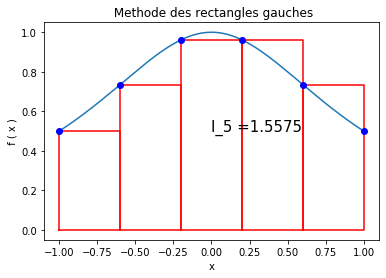

In [9]:
def simul (n,f):
    R=RectangleG(-1,1,n,f)
    return R.Graph(f)
simul(5,f)

In [10]:
interact (simul, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.simul(n, f)>

* **<span style="color:#0000C0">La méthode des trapèzes: </span>**
>**<span style="color:orange">L'algorithme: </span>**
>La méthode des trapèzes est du même tonneau que celle des rectangles. Vous avez sans doute compris qu'on utilise non plus des rectangles pour paver l'aire mais des trapèzes. Ainsi, la partie du pavé qui jouxte la courbe est plus proche, si j'ose m'exprimer de manière aussi peu mathématicienne que cela!
>*  l'intervalle $[a,b]$ en n petits trapèzes de largeur $h = \frac{(b-a)}{n}$. Je sais que l'aire de chaque petit trapèze est $A_i = (\frac{h}{2})*(f(a+ih) + f(a+(i-1)h))$.


In [11]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel('f(x)')
        plt.text(0.2*(self.a+self.b), 0.25*f(self.b), '$I_{%s} =\int_{a}^{b}f(x)dx$=%12.4f' % (self.n,self.integrate(f)), fontsize=15)   
        

In [12]:
def simul (n,f):
    R=Trapezoidal(-1,1,n,f)
    return R.Graph(f)


In [13]:
interact (simul, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.simul(n, f)>

In [14]:
def sim(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    fig=plt.figure(figsize=(12,2))
    plt.subplot(121)
    R.Graph(f)
    plt.subplot(122)
    T.Graph(f)
    plt.show()  

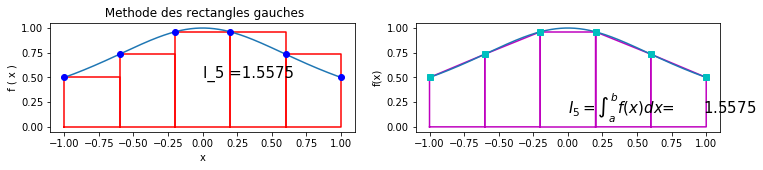

In [15]:
sim(5,f)

In [16]:
interact (sim, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.sim(n, f)>

In [17]:
class Milieu1(object): #class rectange 
    def __init__(self, a, b, n, f):#initialiser les paramètres du classe
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x# contiens les xi
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):

        xl = self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)

       
        
        for i in range(self.n):
            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] # ordonnees des sommets

            
            plt.plot(x_rect, y_rect,"b")
            yflist_fine = f(xlist_fine)
            plt.plot(xlist_fine, yflist_fine)
            plt.plot(m,f(m),"y*")
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.title('Milieu')    

No handles with labels found to put in legend.


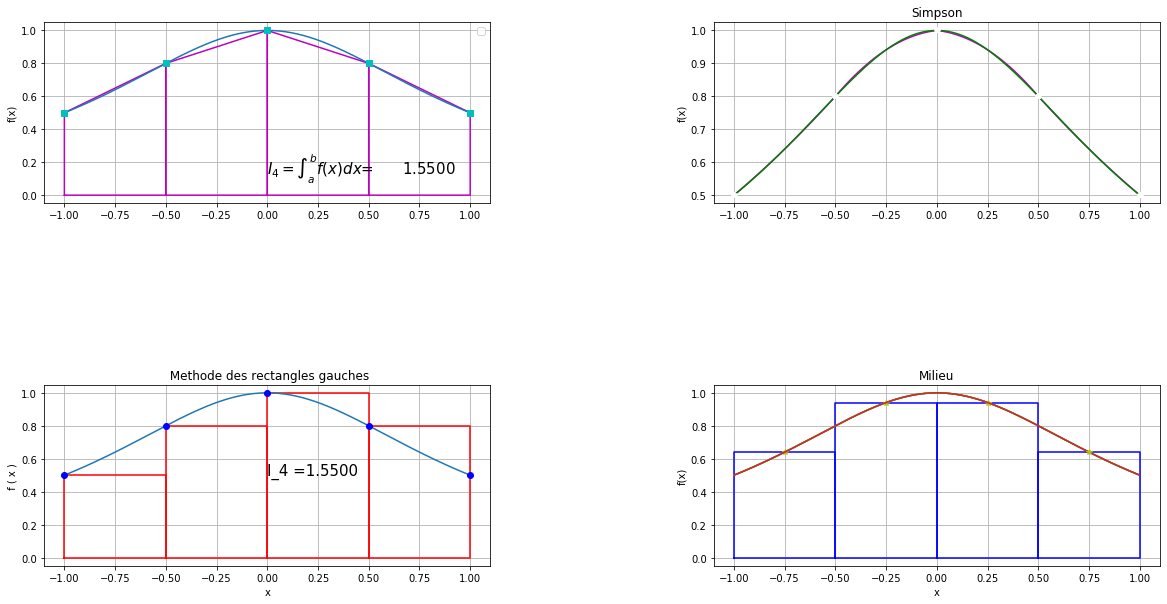

In [18]:
def simulataion(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    S=Simpson(-1,1,n,f)
    M=Milieu1(-1,1,n,f)
    fig=plt.figure(figsize = (20, 10))
    plt.gcf().subplots_adjust( wspace = 0.5, hspace = 1)
    #plt.subplot(121)
    #R.Graph(f)
    #plt.subplot(122)
   # T.Graph(f)
    ax = fig.add_subplot(221) 
    ax.grid()#grid on
    ax.legend(loc=1)
    T.Graph(f) 
    
    ax = fig.add_subplot(222)
    ax.grid()
    S.Graph(f)
    
    ax = fig.add_subplot(223)
    ax.grid()
    R.Graph(f)
    
    ax = fig.add_subplot(224)
    ax.grid()
    M.Graph(f)  
    plt.show()  
simulataion(4,f)

Button(description='Plot', style=ButtonStyle())

Output()

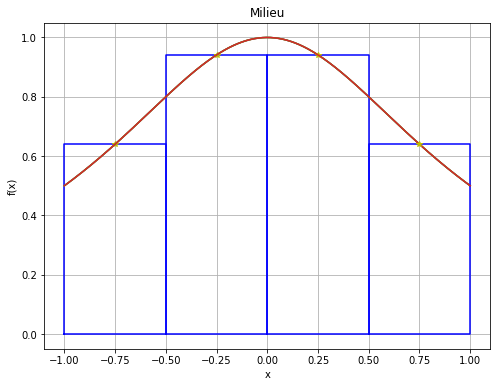

In [19]:
from IPython.display import display
button = widgets.Button(description="Plot")
output = widgets.Output()
M=Milieu1(-1,1,4,f)
display(button, output)
f=lambda x:1/(1+x**2)
def on_button_clicked(b):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.grid()
    return M.Graph(f)

button.on_click(on_button_clicked)